# Distribution of Tickets Purchased per Minute

We have all bets from 2018, which gives us an idea of the number of tickets purchased for any minute of the day. See results elsewhere; the purpose of this notebook is to identify a suitable distribution for the number of tickets purchased per minute. It should satisfy these criteria:

- easily produce discrete (integer) values >0
- have an expected value provided by the (empirical model of) 2018 data, which is formulated as a continuous function that is then rounded to the nearest integer
- statistics are captured well

|  | Payout | No. Winners |
| :--: | :--: | :--: | 
| mean	  |  155960	 |10,3 |
| median  |	112500   | 7,0 |
| mode	  |  80000    | 1,0 |
| std	  |  97807    |10,8 |
| min	  |  800      | 1,0 |
| max	  |  363627   |58,0 |


In [27]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from tickets import *
from minutes import *
from models import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
counts_2018 = np.genfromtxt('2018_count_250108_0209.csv', delimiter=',', skip_header=1)

print(f"Loaded {len(counts_2018)} rows of data")
print(f"The shape is {counts_2018.shape}")

tickets_2018 = np.genfromtxt('2018_tickets_250108_0209.csv', delimiter=',', skip_header=1)

print(f"Loaded {len(tickets_2018)} rows of data")
print(f"The shape is {tickets_2018.shape}")

Loaded 31856 rows of data
The shape is (31856, 2)
Loaded 160813 rows of data
The shape is (160813,)


In [29]:
counts_2018[:5, :]

array([[-1.01541e+05,  1.00000e+00],
       [-9.99880e+04,  1.00000e+00],
       [-8.84540e+04,  1.00000e+00],
       [-5.67600e+04,  1.00000e+00],
       [-5.39380e+04,  1.00000e+00]])

Pickle for breakup_prob_hist is up to date.
Pickle for expected_tickets is up to date.


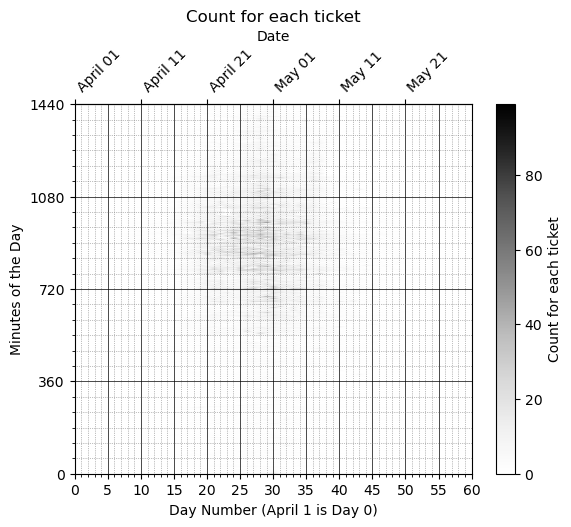

In [30]:
counts_array = Models.map_data_to_day_min(counts_2018[:,1], counts_2018[:,0])

m = Models()
m.plot(counts_array,
       custom_label="Count for each ticket",
       custom_title="Count for each ticket",
       custom_colors='Greys')


In [31]:
day_min_tickets = Minutes.day_min(tickets_2018)
day_min_counts = Minutes.day_min(counts_2018[:, 0])

print(day_min_tickets.shape)
print(day_min_counts.shape)
print(f"The mean day is {np.mean(day_min_tickets[:, 0])}")
print(f"The std day is {np.std(day_min_tickets[:, 0])}")
print(f"The mean min is {np.mean(day_min_tickets[:, 1])}")
print(f"The std min is {np.std(day_min_tickets[:, 1])}")

# # Define the bin edges for x and y
# x_bins = np.arange(10, 50, 1)
# y_bins = np.arange(400, 1441, 60)

# # Create the 2D histogram
# plt.hist2d(day_min[:, 0], day_min[:, 1], bins=[x_bins, y_bins], cmap='viridis')

# # Add color bar
# plt.colorbar(label='Counts')

# # Add labels and title
# plt.xlabel('Column 0')
# plt.ylabel('Column 1')
# plt.title('2D Density Map')

# # Show the plot
# plt.show()

(160813, 2)
(31856, 2)
The mean day is 29.77885494331926
The std day is 8.978221476042602
The mean min is 863.0213913054292
The std min is 255.18749935067723


In [32]:
all = Tickets()
all.add([[1, 60]])
day_min_all = Minutes.day_min(all.tickets)

[-3.20540711 -3.20540711 -3.20540711 ...  3.3660503   3.3660503
  3.3660503 ]
Pickle for breakup_prob_hist is up to date.
Pickle for expected_tickets is up to date.


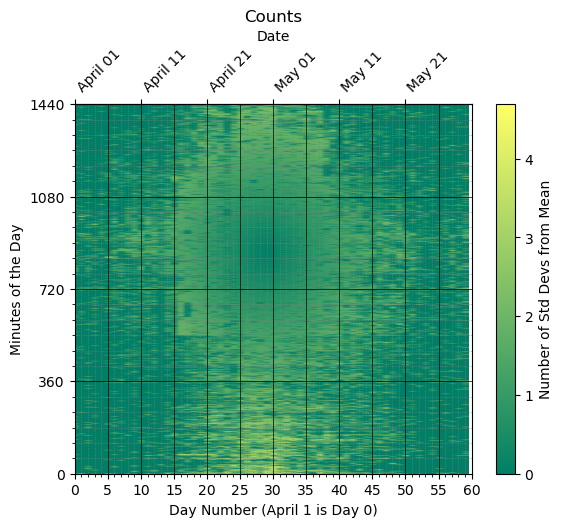

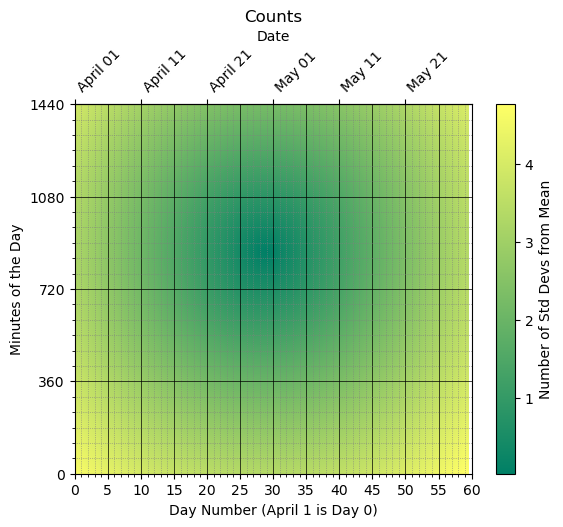

In [33]:
parameters = [np.mean(day_min_tickets[:, 0]),
              np.std(day_min_tickets[:, 0]),
              np.mean(day_min_tickets[:, 1]),
              np.std(day_min_tickets[:, 1])]

transform = Minutes.get_transform(parameters)

day_c, min_c = transform(day_min_counts[:,0], day_min_counts[:,1])
radius = Minutes.radius(day_c, min_c)

day_a, min_a = transform(day_min_all[:,0], day_min_all[:,1])
radius_a = Minutes.radius(day_a, min_a)

print(day_a)

m = Models(model_id=1)
m.plot(Models.map_data_to_day_min(radius, counts_2018[:, 0]),
       custom_label="Number of Std Devs from Mean",
       custom_title="Counts",
       custom_colors='summer')
m.plot(Models.map_data_to_day_min(radius_a, all.tickets),
       custom_label="Number of Std Devs from Mean",
       custom_title="Counts",
       custom_colors='summer')


In [34]:
print(np.max(radius_a))

4.771542316881778


Summary for range 0.00 to 0.25:
  No. min with tickets: 410
  No. min in range:     449
  No. unchosen tickets: 39 (8.69%)
Statistics:
  mode: 6.000
  mode_count: 17.000
  mean: 19.695
  std: 14.246
  min: 1.000
  max: 88.000
  5th: 3.000
  25th: 9.000
  median: 17.000
  75th: 27.000
  95th: 46.550
(<Figure size 1000x600 with 1 Axes>, <scipy.stats._kde.gaussian_kde object at 0x000001ED47933FB0>)


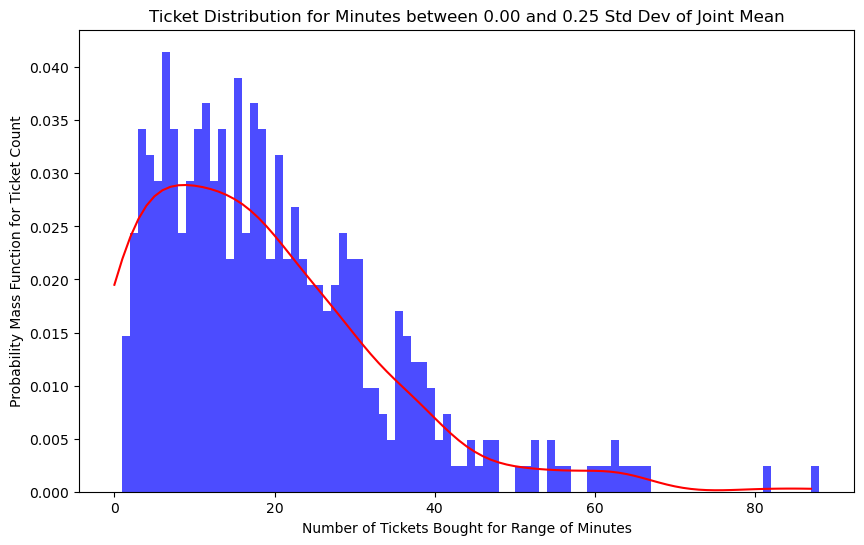

In [35]:
intervals = np.arange(0, 4.75, 0.25)
intervals = np.append(intervals, np.max(radius_a))

di = evaluate_ticket_dist_i(intervals[0], intervals[1],
                             radius, counts_2018[:, 1],
                             radius_a)

di.summarize_stats()
fit=di.hist()
print(fit)

[<models.RadialDist object at 0x000001ED470C06E0>, <models.RadialDist object at 0x000001ED44C9A720>, <models.RadialDist object at 0x000001ED471A2330>, <models.RadialDist object at 0x000001ED441B7140>, <models.RadialDist object at 0x000001ED479EE690>, <models.RadialDist object at 0x000001ED479339E0>, <models.RadialDist object at 0x000001ED47938D40>, <models.RadialDist object at 0x000001ED471A3B00>, <models.RadialDist object at 0x000001ED471A26C0>, <models.RadialDist object at 0x000001ED479ED940>, <models.RadialDist object at 0x000001ED44B6E630>, <models.RadialDist object at 0x000001ED471A3530>, <models.RadialDist object at 0x000001ED44C0B6B0>, <models.RadialDist object at 0x000001ED446BBCB0>, <models.RadialDist object at 0x000001ED4793B860>, <models.RadialDist object at 0x000001ED4793AED0>, <models.RadialDist object at 0x000001ED479ED130>, <models.RadialDist object at 0x000001ED446B9CD0>, <models.RadialDist object at 0x000001ED445D0B00>]


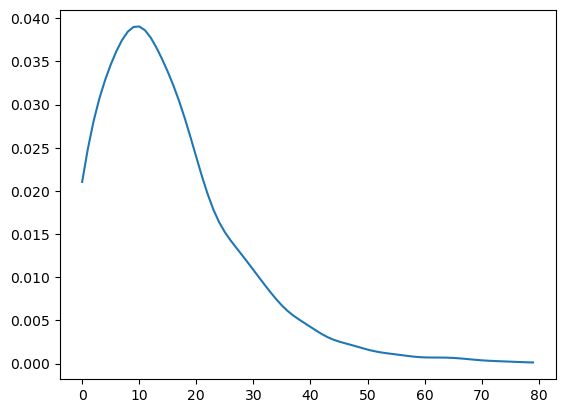

In [36]:
d_all = evaluate_ticket_dist_all(intervals, radius, counts_2018[:, 1], radius_a)

print(d_all)
# Testing
plt.plot(d_all[1].kde.pdf(np.arange(0,80,1)), label='All Tickets')

In [37]:
print('No.\tstd0\tstd1\tChosen\tTotal\tUnchsn\t%unch\ttotal')
for i, d in enumerate(d_all):
    print(f"{i}"
          +f"\t{d.range[0]:.2f}"
          +f"\t{d.range[1]:.2f}"
          +f"\t{d.N_chosen}"
          +f"\t{d.N_total}"
          +f"\t{d.N_unchosen}"
          +f"\t{d.N_chosen/d.N_total*100:.2f}"
          +f"\t{int(np.sum(d.counts))}")

No.	std0	std1	Chosen	Total	Unchsn	%unch	total
0	0.00	0.25	410	449	39	91.31	8075
1	0.25	0.50	1262	1360	98	92.79	20786
2	0.50	0.75	2023	2218	195	91.21	26568
3	0.75	1.00	2821	3182	361	88.65	28390
4	1.00	1.25	3507	4012	505	87.41	24643
5	1.25	1.50	4053	4995	942	81.14	17298
6	1.50	1.75	3950	5798	1848	68.13	11233
7	1.75	2.00	3311	6787	3476	48.78	7061
8	2.00	2.25	2821	7595	4774	37.14	5052
9	2.25	2.50	2027	7825	5798	25.90	3151
10	2.50	2.75	1440	7781	6341	18.51	2144
11	2.75	3.00	1259	8201	6942	15.35	1830
12	3.00	3.25	1132	8457	7325	13.39	1555
13	3.25	3.50	951	7541	6590	12.61	1531
14	3.50	3.75	332	4555	4223	7.29	449
15	3.75	4.00	163	2787	2624	5.85	253
16	4.00	4.25	82	1618	1536	5.07	138
17	4.25	4.50	60	918	858	6.54	81
18	4.50	4.77	45	321	276	14.02	101


In [38]:
from matplotlib.pylab import f


print('No.\tstd1\t%unch\tmode\tN_mode\t%_mode\tmedian\tmean\tstd\tmin\tmax')
for i, d in enumerate(d_all):
    print(f"{i}"
          +f"\t{d.range[1]:.2f}"
          +f"\t{d.N_chosen/d.N_total*100:.2f}"
          +f"\t{d.stats['mode']:.2f}"
          +f"\t{d.stats['mode_count']}"
          +f"\t{d.stats['mode_count']/d.N_chosen*100:.0f}"
          +f"\t{d.stats['median']:.2f}"
          +f"\t{d.stats['mean']:.2f}"
          +f"\t{d.stats['std']:.2f}"
          +f"\t{d.stats['min']:.2f}"
          +f"\t{d.stats['max']:.2f}")
          

No.	std1	%unch	mode	N_mode	%_mode	median	mean	std	min	max
0	0.25	91.31	6.00	17	4	17.00	19.70	14.25	1.00	88.00
1	0.50	92.79	10.00	58	5	14.00	16.47	12.15	1.00	87.00
2	0.75	91.21	9.00	124	6	11.00	13.13	9.82	1.00	99.00
3	1.00	88.65	6.00	216	8	8.00	10.06	7.50	1.00	66.00
4	1.25	87.41	2.00	401	11	6.00	7.03	5.39	1.00	50.00
5	1.50	81.14	2.00	740	18	3.00	4.27	3.37	1.00	47.00
6	1.75	68.13	1.00	1249	32	2.00	2.84	2.32	1.00	34.00
7	2.00	48.78	1.00	1563	47	2.00	2.13	1.70	1.00	28.00
8	2.25	37.14	1.00	1699	60	1.00	1.79	1.73	1.00	38.00
9	2.50	25.90	1.00	1374	68	1.00	1.55	1.27	1.00	19.00
10	2.75	18.51	1.00	1043	72	1.00	1.49	1.15	1.00	19.00
11	3.00	15.35	1.00	908	72	1.00	1.45	1.03	1.00	18.00
12	3.25	13.39	1.00	842	74	1.00	1.37	0.82	1.00	14.00
13	3.50	12.61	1.00	696	73	1.00	1.61	2.00	1.00	39.00
14	3.75	7.29	1.00	283	85	1.00	1.35	1.46	1.00	16.00
15	4.00	5.85	1.00	137	84	1.00	1.55	1.97	1.00	15.00
16	4.25	5.07	1.00	70	85	1.00	1.68	2.09	1.00	10.00
17	4.50	6.54	1.00	53	88	1.00	1.35	1.25	1.00	8.00
18	4.77	14.02	

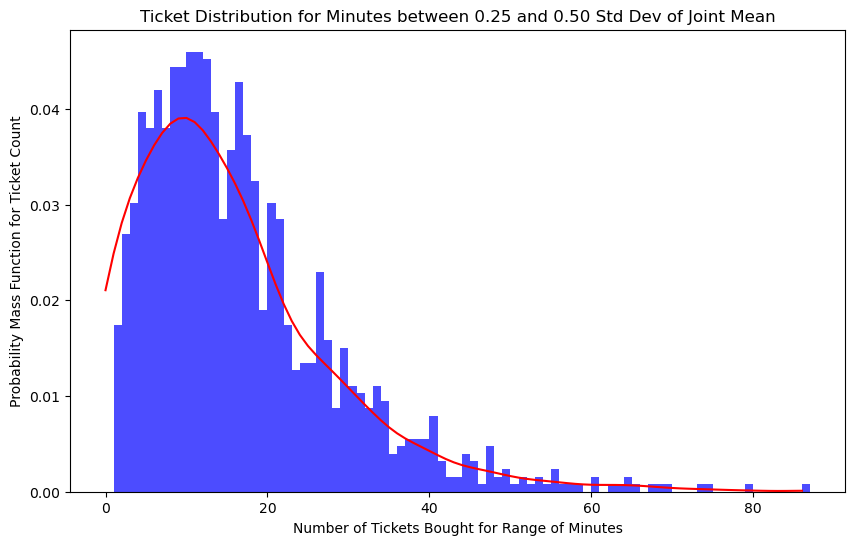

In [39]:
f = d_all[1].hist()

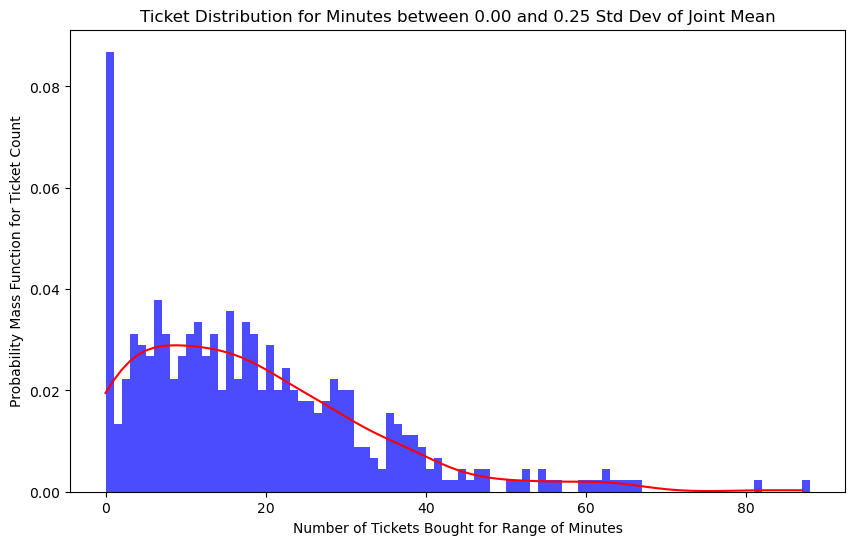

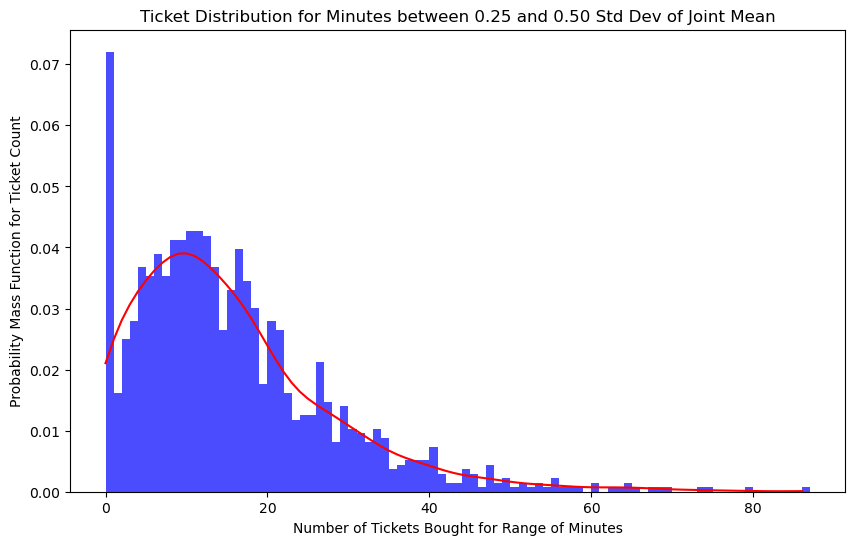

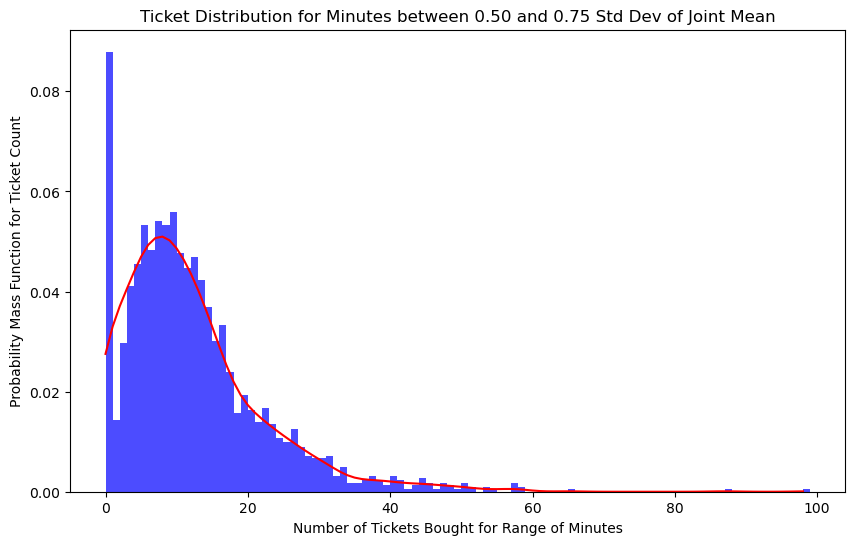

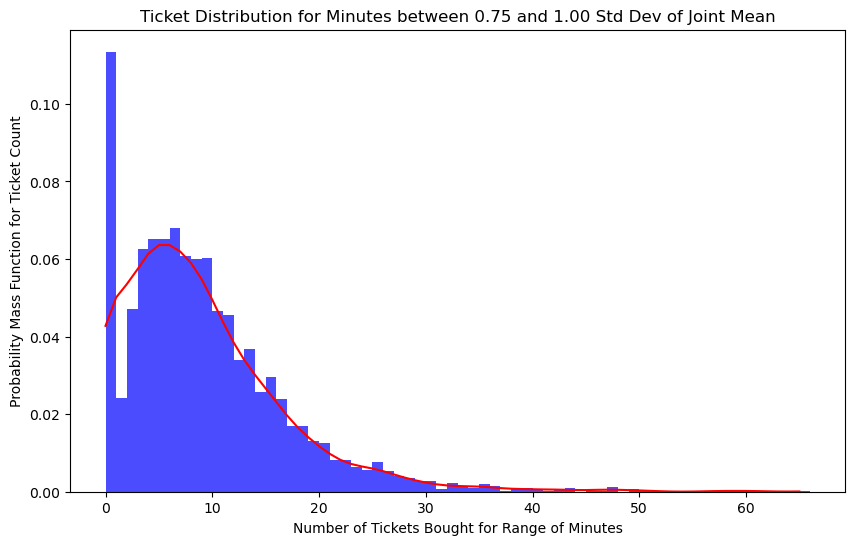

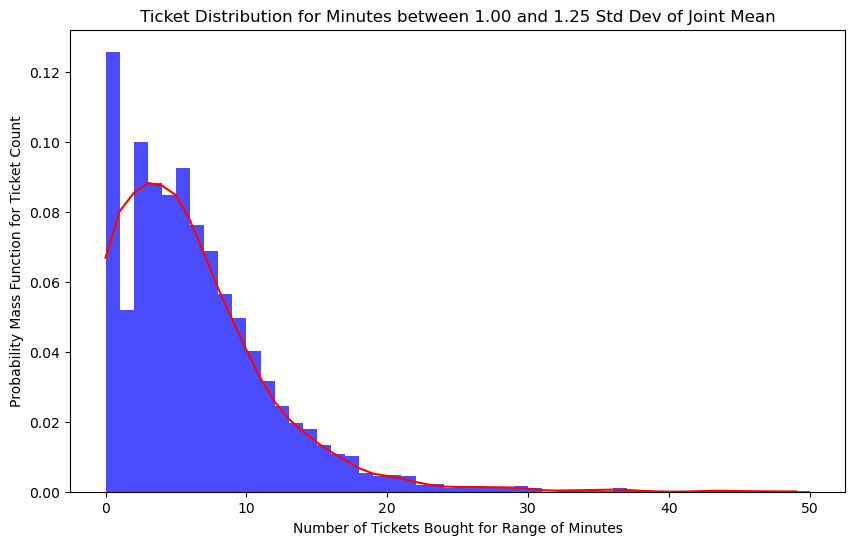

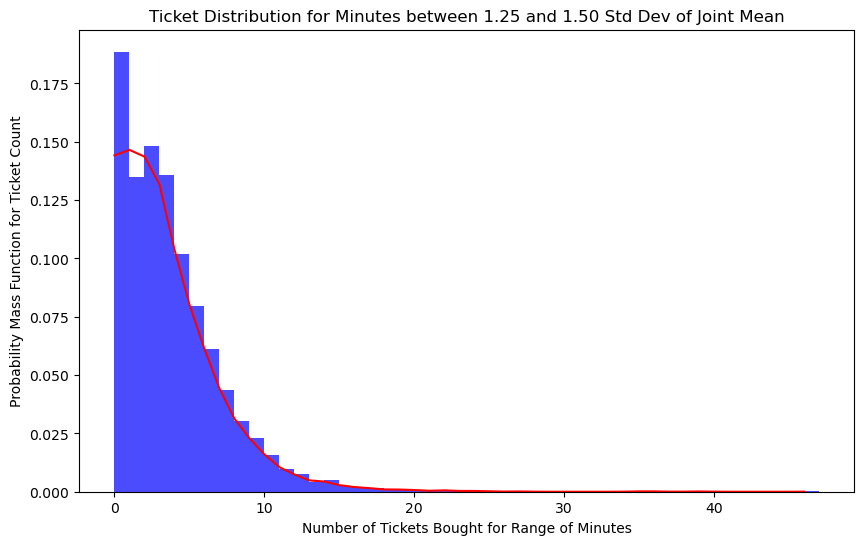

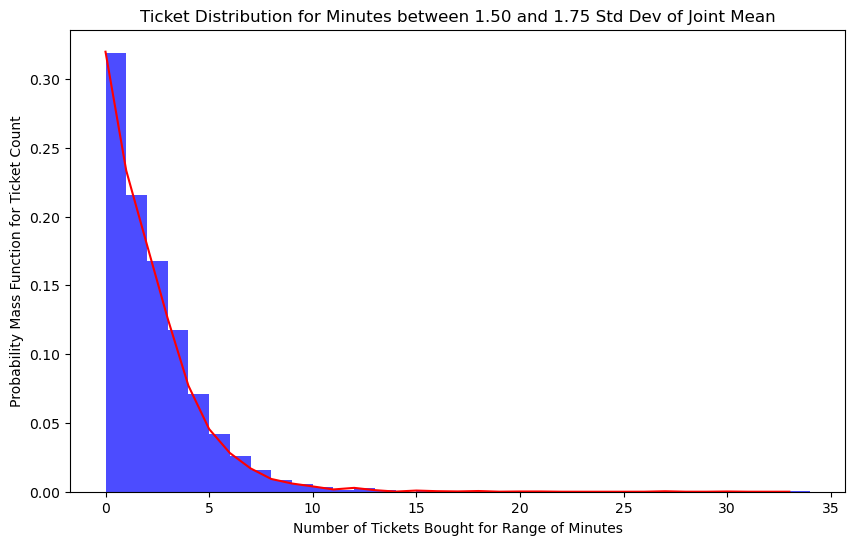

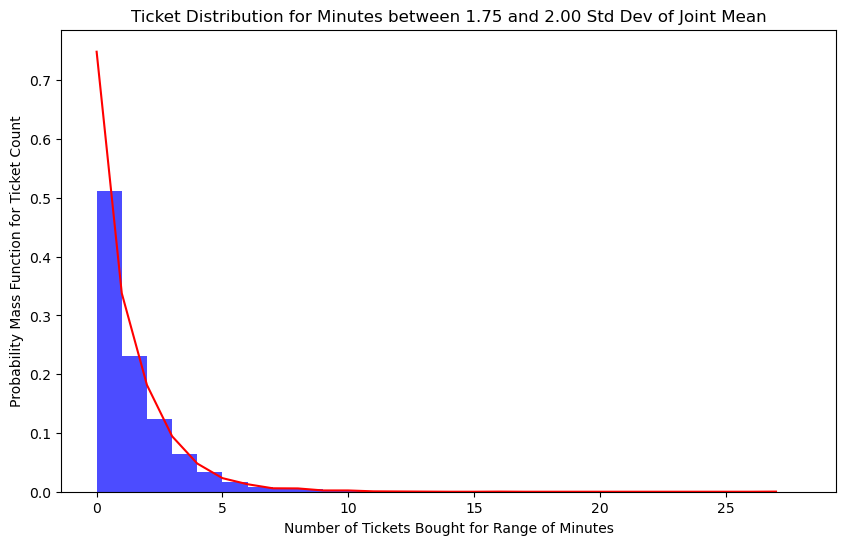

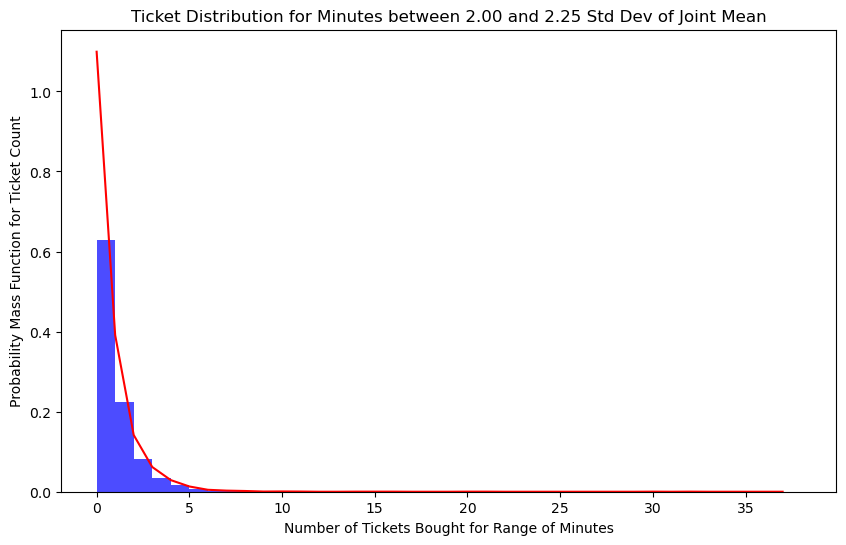

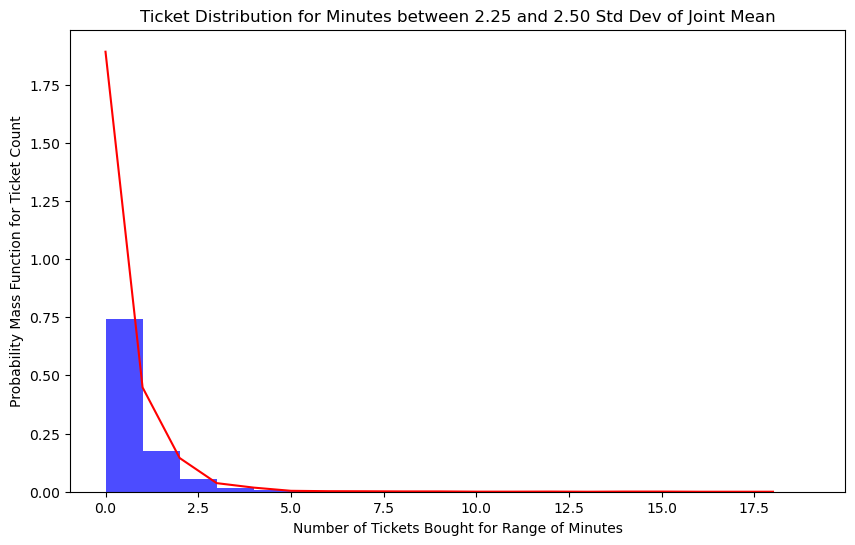

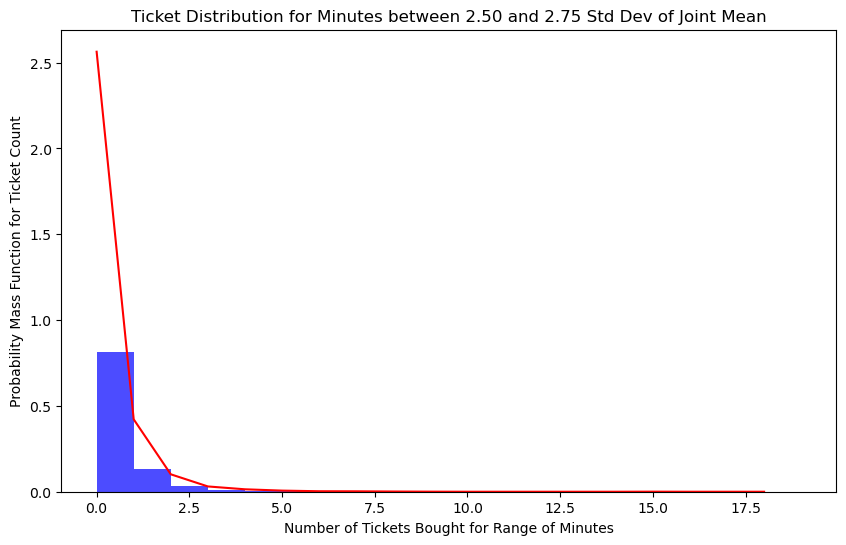

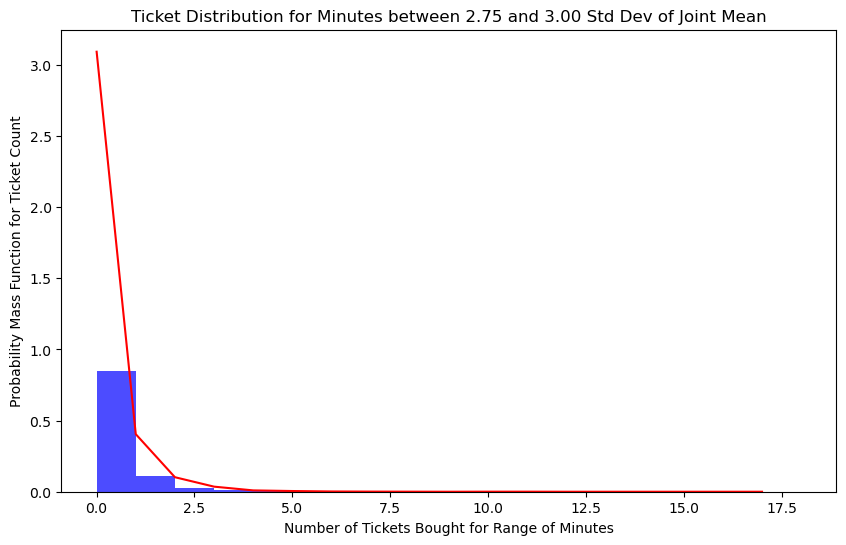

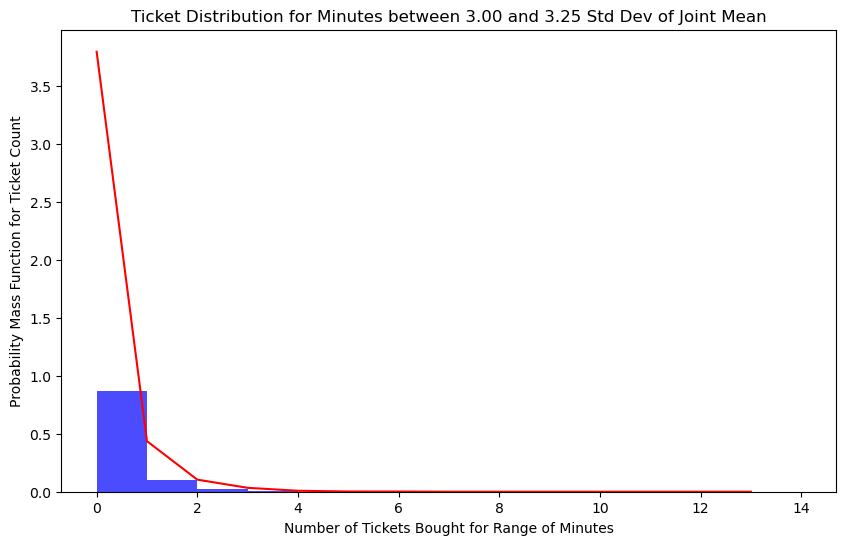

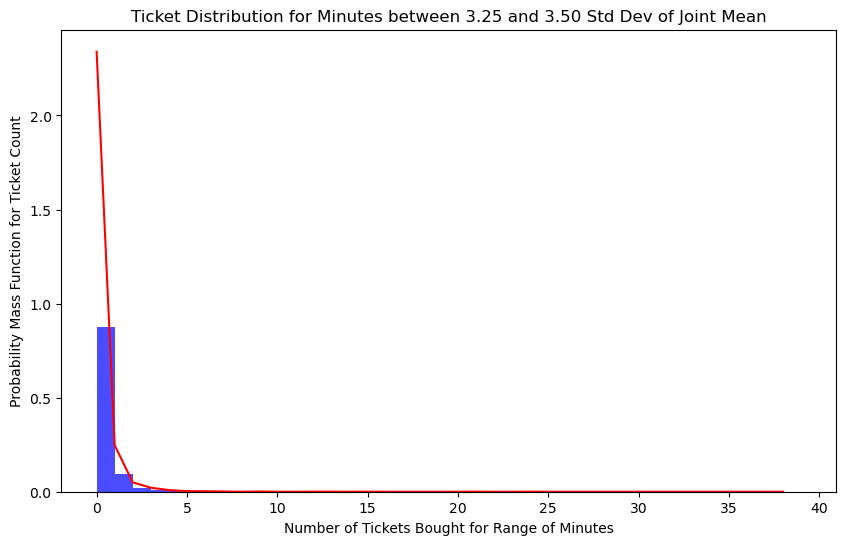

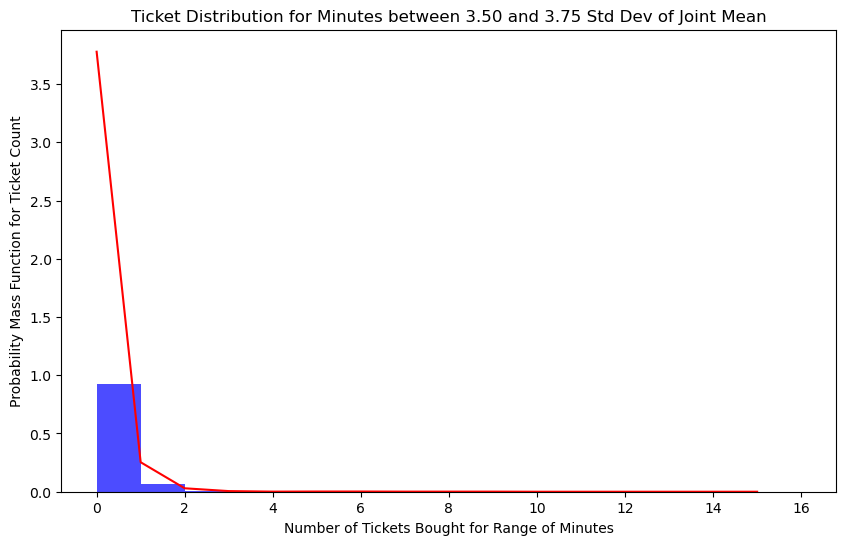

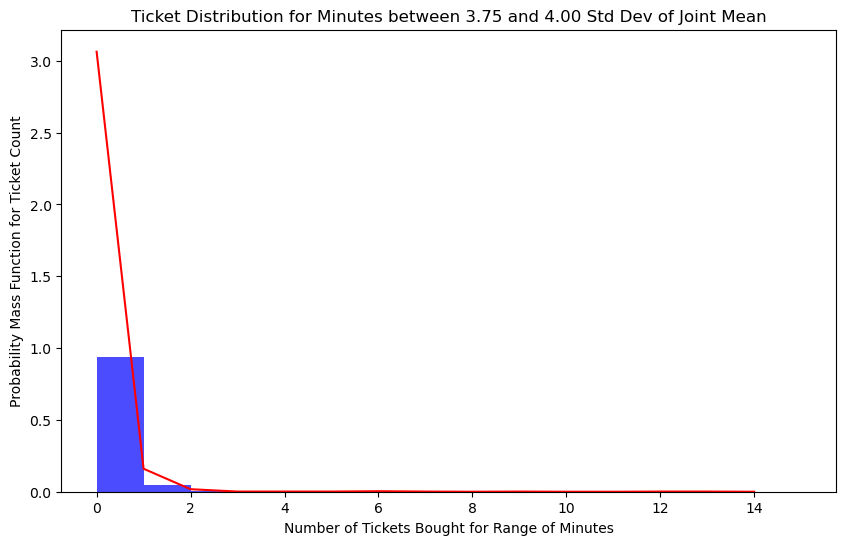

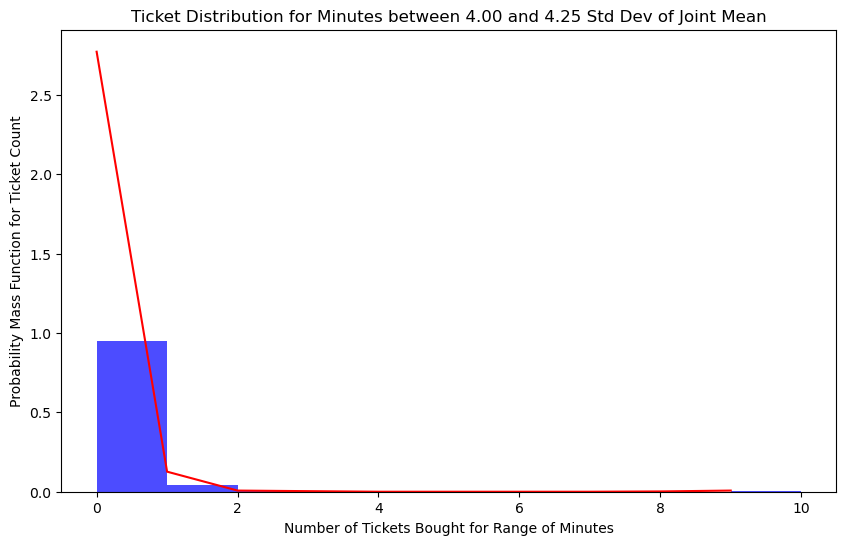

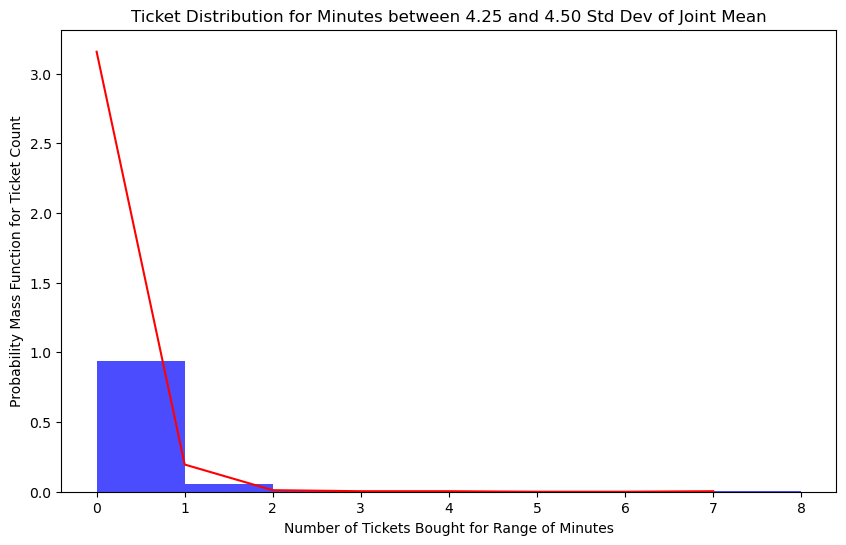

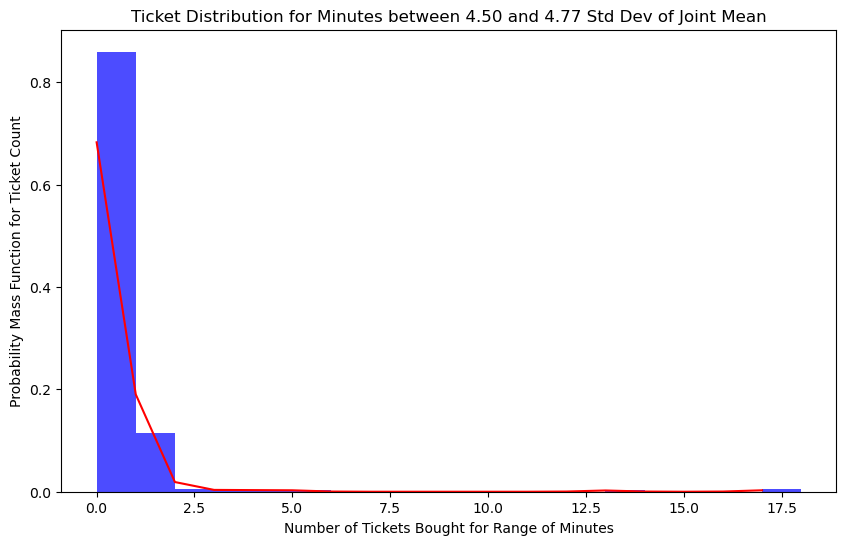

In [40]:
for i in range(len(d_all)):
    d_all[i].hist(include_zeros=True)

In [41]:
with open('pickles/List_of_radial_object.pkl', 'wb') as f:
    pickle.dump(d_all, f)

print("RadialDist list saved to 'radial_dist_list.pkl'")

RadialDist list saved to 'radial_dist_list.pkl'
